In [1]:
%reset -sf

from IPython.core.interactiveshell import InteractiveShell
from IPython import display
InteractiveShell.ast_node_interactivity = 'all'

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
np.set_printoptions(suppress=True)
import random

import pandas as pd
idx = pd.IndexSlice
pd.options.display.float_format = '{:,.2f}'.format
# pd.set_option('display.precision',2)

from pathlib import Path
import itertools as it
from pprint import pprint
import datetime as dti

# from torch import save, from_numpy

from sklearn.cluster import MiniBatchKMeans

In [30]:
df = pd.read_csv('train.csv')
df

,id,breath_id,R,C,time_step,u_in,u_out,pressure
0,1,1,20,50,0.00,0.08,0,5.84
1,2,1,20,50,0.03,18.38,0,5.91
2,3,1,20,50,0.07,22.51,0,7.88
3,4,1,20,50,0.10,22.81,0,11.74
4,5,1,20,50,0.14,25.36,0,12.23
...,...,...,...,...,...,...,...,...
6035995,6035996,125749,50,10,2.50,1.49,1,3.87
6035996,6035997,125749,50,10,2.54,1.49,1,3.87
6035997,6035998,125749,50,10,2.57,1.56,1,3.80
6035998,6035999,125749,50,10,2.60,1.27,1,4.08


In [31]:
df

,id,breath_id,R,C,time_step,u_in,u_out,pressure
0,1,1,20,50,0.00,0.08,0,5.84
1,2,1,20,50,0.03,18.38,0,5.91
2,3,1,20,50,0.07,22.51,0,7.88
3,4,1,20,50,0.10,22.81,0,11.74
4,5,1,20,50,0.14,25.36,0,12.23
...,...,...,...,...,...,...,...,...
6035995,6035996,125749,50,10,2.50,1.49,1,3.87
6035996,6035997,125749,50,10,2.54,1.49,1,3.87
6035997,6035998,125749,50,10,2.57,1.56,1,3.80
6035998,6035999,125749,50,10,2.60,1.27,1,4.08


In [35]:
(df.pressure/10).std()

0.8109703450419988

In [13]:
mk = MiniBatchKMeans(1000)
X = df.iloc[:, 2:-1]
mk.fit(X)

MiniBatchKMeans(n_clusters=1000)

In [14]:
pd.DataFrame(mk.cluster_centers_, columns=X.columns)

,R,C,time_step,u_in,u_out
0,20.00,10.00,1.28,0.00,1.00
1,50.00,20.00,2.01,4.63,1.00
2,5.00,20.00,2.11,4.79,1.00
3,50.00,50.00,2.13,4.80,1.00
4,5.00,50.00,0.49,56.46,0.00
...,...,...,...,...,...
995,20.00,10.00,2.60,4.98,1.00
996,20.00,20.00,2.59,4.98,1.00
997,20.00,10.00,0.35,1.90,0.00
998,20.00,10.00,2.14,4.81,1.00


In [28]:
sample = X.sample(n=2)
mk.predict(sample)

array([77, 19], dtype=int32)

In [26]:
mk.n_iter_

2

In [27]:
df = pd.read_csv('test.csv')
df

,id,breath_id,R,C,time_step,u_in,u_out
0,1,0,5,20,0.00,0.00,0
1,2,0,5,20,0.03,7.52,0
2,3,0,5,20,0.06,14.65,0
3,4,0,5,20,0.10,21.23,0
4,5,0,5,20,0.13,26.32,0
...,...,...,...,...,...,...,...
4023995,4023996,125748,20,10,2.53,4.97,1
4023996,4023997,125748,20,10,2.56,4.98,1
4023997,4023998,125748,20,10,2.60,4.98,1
4023998,4023999,125748,20,10,2.63,4.98,1


In [4]:
pt = from_numpy(df.to_numpy())
pt

tensor([[1.0000e+00, 0.0000e+00, 5.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [2.0000e+00, 0.0000e+00, 5.0000e+00,  ..., 3.1904e-02, 7.5150e+00,
         0.0000e+00],
        [3.0000e+00, 0.0000e+00, 5.0000e+00,  ..., 6.3827e-02, 1.4652e+01,
         0.0000e+00],
        ...,
        [4.0240e+06, 1.2575e+05, 2.0000e+01,  ..., 2.5975e+00, 4.9795e+00,
         1.0000e+00],
        [4.0240e+06, 1.2575e+05, 2.0000e+01,  ..., 2.6311e+00, 4.9826e+00,
         1.0000e+00],
        [4.0240e+06, 1.2575e+05, 2.0000e+01,  ..., 2.6653e+00, 4.9854e+00,
         1.0000e+00]], dtype=torch.float64)

In [5]:
save(pt, 'test.pth')

In [2]:
df = pd.read_parquet('train.gzip.parquet')
df

,id,breath_id,R,C,time_step,u_in,u_out,pressure
0,1,1,20,50,0.00,0.08,0,5.84
1,2,1,20,50,0.03,18.38,0,5.91
2,3,1,20,50,0.07,22.51,0,7.88
3,4,1,20,50,0.10,22.81,0,11.74
4,5,1,20,50,0.14,25.36,0,12.23
...,...,...,...,...,...,...,...,...
6035995,6035996,125749,50,10,2.50,1.49,1,3.87
6035996,6035997,125749,50,10,2.54,1.49,1,3.87
6035997,6035998,125749,50,10,2.57,1.56,1,3.80
6035998,6035999,125749,50,10,2.60,1.27,1,4.08


In [21]:
(pt[:, 1]==54759).sum()

tensor(0)

In [35]:
df['diff'] = df['breath_id'].diff()
df

,id,breath_id,R,C,time_step,u_in,u_out,pressure,diff
0,1,1,20,50,0.00,0.08,0,5.84,NaN
1,2,1,20,50,0.03,18.38,0,5.91,0.00
2,3,1,20,50,0.07,22.51,0,7.88,0.00
3,4,1,20,50,0.10,22.81,0,11.74,0.00
4,5,1,20,50,0.14,25.36,0,12.23,0.00
...,...,...,...,...,...,...,...,...,...
6035995,6035996,125749,50,10,2.50,1.49,1,3.87,0.00
6035996,6035997,125749,50,10,2.54,1.49,1,3.87,0.00
6035997,6035998,125749,50,10,2.57,1.56,1,3.80,0.00
6035998,6035999,125749,50,10,2.60,1.27,1,4.08,0.00


In [42]:
mask = df['diff'] > 1

df[mask]['diff'].value_counts()

2.00     18216
3.00      7217
4.00      2893
5.00      1199
6.00       433
7.00       174
8.00        66
9.00        30
10.00       22
12.00        3
11.00        2
13.00        1
Name: diff, dtype: int64

In [44]:
df['pressure'].mean(), df['pressure'].std() 

(11.220408111543698, 8.109703450419985)

In [45]:
df = pd.read_csv('test.csv')
df

,id,breath_id,R,C,time_step,u_in,u_out
0,1,0,5,20,0.00,0.00,0
1,2,0,5,20,0.03,7.52,0
2,3,0,5,20,0.06,14.65,0
3,4,0,5,20,0.10,21.23,0
4,5,0,5,20,0.13,26.32,0
...,...,...,...,...,...,...,...
4023995,4023996,125748,20,10,2.53,4.97,1
4023996,4023997,125748,20,10,2.56,4.98,1
4023997,4023998,125748,20,10,2.60,4.98,1
4023998,4023999,125748,20,10,2.63,4.98,1


In [7]:
df.pivot_table(
    index='breath_id',
    values='time_step',
    aggfunc='count'
)

,time_step
breath_id,
1,80
2,80
3,80
4,80
5,80
...,...
125740,80
125742,80
125743,80


In [8]:
80 * 75450

6036000

In [8]:
snt = [
    'It was raining hard when Tom arrived at Mary\'s house.',
    'Who do you think is going to get married next?',
    'I certainly hope you\'re planning to come to my party.',
    'The region boasts the most beautiful ladies of the country.',
    'He is well off, so he doesn\'t worry about money.',
    'The number 1010 in base 2 equals the number 10.',
    'We must get rid of this foul garbage right away.',
    'I want to know when I need to be there.',
    'Tom asked me if I would mind working late today.',
    'The principal\'s democracy made him popular among teachers and students.',
    'They plan to do away with most of these regulations.',
    'There were a desk and a chair in the room.',
    'I don\'t know what you think is going to change.',
    'I went to the theater to see a modern drama.',
    'Tom doesn\'t need to tell me how to do that.'
]
snt

["It was raining hard when Tom arrived at Mary's house.",
 'Who do you think is going to get married next?',
 "I certainly hope you're planning to come to my party.",
 'The region boasts the most beautiful ladies of the country.',
 "He is well off, so he doesn't worry about money.",
 'The number 1010 in base 2 equals the number 10.',
 'We must get rid of this foul garbage right away.',
 'I want to know when I need to be there.',
 'Tom asked me if I would mind working late today.',
 "The principal's democracy made him popular among teachers and students.",
 'They plan to do away with most of these regulations.',
 'There were a desk and a chair in the room.',
 "I don't know what you think is going to change.",
 'I went to the theater to see a modern drama.',
 "Tom doesn't need to tell me how to do that."]

In [23]:
s = set()
_ = [s.update(snt.split()) for snt in snt]
s

{'10.',
 '1010',
 '2',
 'He',
 'I',
 'It',
 "Mary's",
 'The',
 'There',
 'They',
 'Tom',
 'We',
 'Who',
 'a',
 'about',
 'among',
 'and',
 'arrived',
 'asked',
 'at',
 'away',
 'away.',
 'base',
 'be',
 'beautiful',
 'boasts',
 'certainly',
 'chair',
 'change.',
 'come',
 'country.',
 'democracy',
 'desk',
 'do',
 "doesn't",
 "don't",
 'drama.',
 'equals',
 'foul',
 'garbage',
 'get',
 'going',
 'hard',
 'he',
 'him',
 'hope',
 'house.',
 'how',
 'if',
 'in',
 'is',
 'know',
 'ladies',
 'late',
 'made',
 'married',
 'me',
 'mind',
 'modern',
 'money.',
 'most',
 'must',
 'my',
 'need',
 'next?',
 'number',
 'of',
 'off,',
 'party.',
 'plan',
 'planning',
 'popular',
 "principal's",
 'raining',
 'region',
 'regulations.',
 'rid',
 'right',
 'room.',
 'see',
 'so',
 'students.',
 'teachers',
 'tell',
 'that.',
 'the',
 'theater',
 'there.',
 'these',
 'think',
 'this',
 'to',
 'today.',
 'want',
 'was',
 'well',
 'went',
 'were',
 'what',
 'when',
 'with',
 'working',
 'worry',
 'would',

In [30]:
d = dict(zip(s, range(len(s))))
d

{'asked': 0,
 'base': 1,
 'We': 2,
 'and': 3,
 "Mary's": 4,
 'must': 5,
 'students.': 6,
 'how': 7,
 'room.': 8,
 'plan': 9,
 'were': 10,
 'the': 11,
 'at': 12,
 'planning': 13,
 'He': 14,
 'about': 15,
 'these': 16,
 'among': 17,
 'certainly': 18,
 'today.': 19,
 "doesn't": 20,
 'is': 21,
 'hope': 22,
 "don't": 23,
 'theater': 24,
 'with': 25,
 'party.': 26,
 'would': 27,
 'this': 28,
 'to': 29,
 'ladies': 30,
 'teachers': 31,
 'he': 32,
 '10.': 33,
 'garbage': 34,
 'number': 35,
 'rid': 36,
 'need': 37,
 'beautiful': 38,
 'hard': 39,
 '2': 40,
 'arrived': 41,
 'It': 42,
 'desk': 43,
 'chair': 44,
 'The': 45,
 'working': 46,
 'popular': 47,
 'foul': 48,
 'a': 49,
 'change.': 50,
 'him': 51,
 'house.': 52,
 'married': 53,
 'I': 54,
 'in': 55,
 'do': 56,
 'when': 57,
 'away': 58,
 'that.': 59,
 'think': 60,
 'there.': 61,
 'They': 62,
 'mind': 63,
 'well': 64,
 'going': 65,
 'region': 66,
 'raining': 67,
 'next?': 68,
 "principal's": 69,
 'Tom': 70,
 '1010': 71,
 'you': 72,
 'my': 73,
 

In [56]:
new_mat = [[d[word] for word in snt] for snt in [snt.split() for snt in snt]]
new_mat

[[42, 83, 67, 39, 57, 70, 41, 12, 4, 52],
 [76, 56, 72, 60, 21, 65, 29, 102, 53, 68],
 [54, 18, 22, 103, 13, 29, 100, 29, 73, 26],
 [45, 66, 87, 11, 85, 38, 30, 74, 11, 90],
 [14, 21, 64, 78, 75, 32, 20, 93, 15, 86],
 [45, 35, 71, 55, 1, 40, 91, 11, 35, 33],
 [2, 5, 102, 36, 74, 28, 48, 34, 81, 82],
 [54, 80, 29, 101, 57, 54, 37, 29, 88, 61],
 [70, 0, 99, 92, 54, 27, 63, 46, 105, 19],
 [45, 69, 95, 98, 51, 47, 17, 31, 3, 6],
 [62, 9, 29, 56, 58, 25, 85, 74, 16, 94],
 [84, 10, 49, 43, 3, 49, 44, 55, 11, 8],
 [54, 23, 101, 79, 72, 60, 21, 65, 29, 50],
 [54, 89, 29, 11, 24, 29, 77, 49, 104, 96],
 [70, 20, 37, 29, 97, 99, 7, 29, 56, 59]]

In [60]:
new_mat2 = np.array(new_mat)
new_mat2

array([[ 42,  83,  67,  39,  57,  70,  41,  12,   4,  52],
       [ 76,  56,  72,  60,  21,  65,  29, 102,  53,  68],
       [ 54,  18,  22, 103,  13,  29, 100,  29,  73,  26],
       [ 45,  66,  87,  11,  85,  38,  30,  74,  11,  90],
       [ 14,  21,  64,  78,  75,  32,  20,  93,  15,  86],
       [ 45,  35,  71,  55,   1,  40,  91,  11,  35,  33],
       [  2,   5, 102,  36,  74,  28,  48,  34,  81,  82],
       [ 54,  80,  29, 101,  57,  54,  37,  29,  88,  61],
       [ 70,   0,  99,  92,  54,  27,  63,  46, 105,  19],
       [ 45,  69,  95,  98,  51,  47,  17,  31,   3,   6],
       [ 62,   9,  29,  56,  58,  25,  85,  74,  16,  94],
       [ 84,  10,  49,  43,   3,  49,  44,  55,  11,   8],
       [ 54,  23, 101,  79,  72,  60,  21,  65,  29,  50],
       [ 54,  89,  29,  11,  24,  29,  77,  49, 104,  96],
       [ 70,  20,  37,  29,  97,  99,   7,  29,  56,  59]])

In [69]:
new_mat2.T

array([[ 42,  76,  54,  45,  14,  45,   2,  54,  70,  45,  62,  84,  54,
         54,  70],
       [ 83,  56,  18,  66,  21,  35,   5,  80,   0,  69,   9,  10,  23,
         89,  20],
       [ 67,  72,  22,  87,  64,  71, 102,  29,  99,  95,  29,  49, 101,
         29,  37],
       [ 39,  60, 103,  11,  78,  55,  36, 101,  92,  98,  56,  43,  79,
         11,  29],
       [ 57,  21,  13,  85,  75,   1,  74,  57,  54,  51,  58,   3,  72,
         24,  97],
       [ 70,  65,  29,  38,  32,  40,  28,  54,  27,  47,  25,  49,  60,
         29,  99],
       [ 41,  29, 100,  30,  20,  91,  48,  37,  63,  17,  85,  44,  21,
         77,   7],
       [ 12, 102,  29,  74,  93,  11,  34,  29,  46,  31,  74,  55,  65,
         49,  29],
       [  4,  53,  73,  11,  15,  35,  81,  88, 105,   3,  16,  11,  29,
        104,  56],
       [ 52,  68,  26,  90,  86,  33,  82,  61,  19,   6,  94,   8,  50,
         96,  59]])

In [61]:
l1 = new_mat2[0]
l1

array([42, 83, 67, 39, 57, 70, 41, 12,  4, 52])

In [68]:
new_mat2 @ new_mat2.T

array([[27357, 26912, 18116, 27973, 22644, 20273, 21879, 27208, 22672,
        25394, 21859, 15843, 26686, 24578, 24596],
       [26912, 41040, 26529, 33416, 31892, 24273, 28039, 34282, 34233,
        28352, 30760, 24313, 34992, 33496, 29457],
       [18116, 26529, 32189, 17161, 20507, 24292, 21755, 30255, 32712,
        20856, 25653, 18689, 23767, 26651, 19236],
       [27973, 33416, 17161, 37337, 31420, 19621, 29271, 27955, 26550,
        25420, 29065, 17524, 32263, 29810, 28297],
       [22644, 31892, 20507, 31420, 34136, 17760, 28304, 28176, 28153,
        24916, 29337, 16517, 32385, 23980, 25224],
       [20273, 24273, 24292, 19621, 17760, 23633, 20964, 23840, 26914,
        20697, 21513, 17195, 22514, 23747, 16992],
       [21879, 28039, 21755, 29271, 28304, 20964, 34734, 27724, 32953,
        21348, 25735, 13887, 30044, 28153, 25704],
       [27208, 34282, 30255, 27955, 28176, 23840, 27724, 40198, 34543,
        28206, 27654, 18596, 31272, 34200, 29884],
       [22672, 34233, 32

In [237]:
inputs = np.linspace(0,np.random.randint(10,20),200)

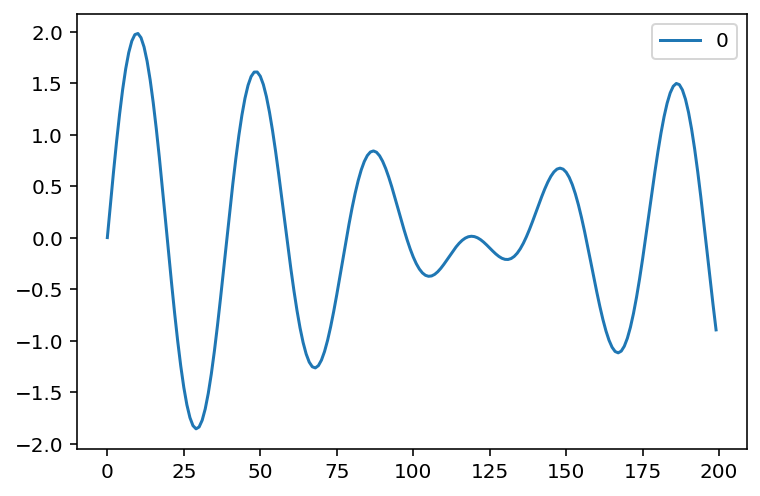

In [241]:
def create_ser(inputs):
    x1 = np.random.randint(-3,3) + np.random.random()
    ser = np.sin(x1*inputs) + np.sin(np.pi*inputs)
    return ser

ser = create_ser(inputs)
_ = pd.DataFrame(ser).plot()

In [289]:
def create_S(inputs):
    vols = {}
    for i in range(5):
        x1 = np.random.randint(-3,3) + np.random.random()
        x2 = np.random.randint(-3,3) + np.random.random()
        x3 = np.random.randint(-3,3) + np.random.random()
        x4 = np.random.randint(-3,3) + np.random.random()
        b = np.random.randint(-3,3) + np.random.random()
        S = x1 * np.sin(inputs * x2 + x3) + x4
        S = inputs - S
        vols[(S.std()/S.mean()).round(5)] = S
    best_S = list(vols.keys())
    best_S = vols[min(best_S)]
    return best_S

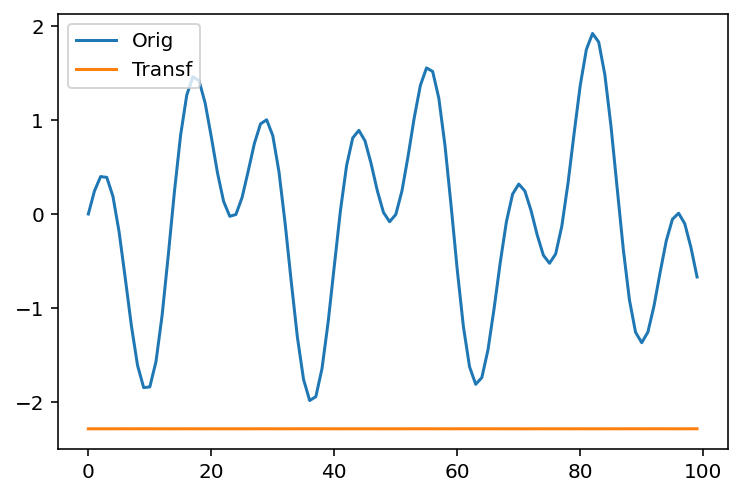

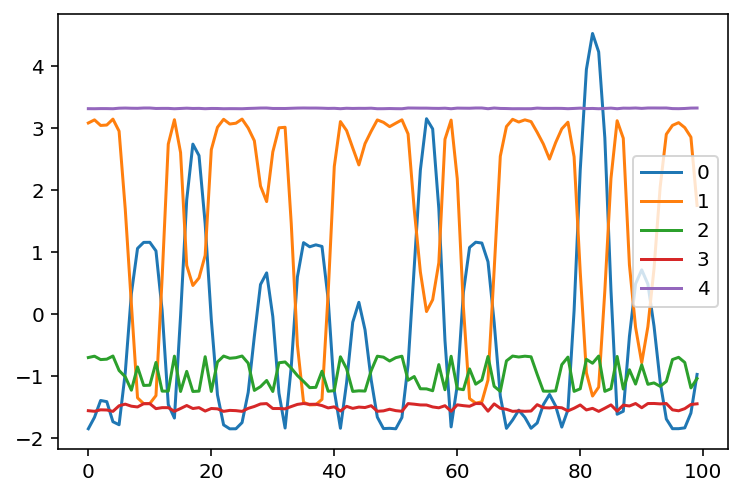

In [307]:
inputs = np.linspace(0,np.random.randint(10,20),100)
ser = create_ser(inputs)
orig = ser.copy()

#curr = ser.max() - ser.min()
fig, ax = plt.subplots()
S = {}
for i in range(5):
    S[i] = create_S(ser)
    ser -= S[i]

_ = ax.plot(orig, label='Orig')
_ = ax.plot(ser, label='Transf')
_ = plt.legend()

_ = pd.DataFrame(list(S.values())).T.plot()

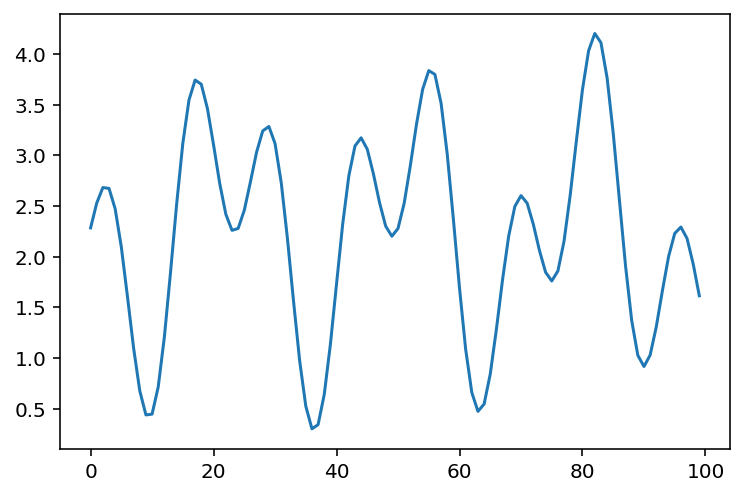

In [310]:
pd.DataFrame(list(S.values())).T.sum(axis=1).plot()

In [189]:
df = pd.read_excel('trans.xlsx')
df.columns = df.columns.str.strip()
df.index = pd.to_datetime(df['FECHA2'], dayfirst=True)
#df = df[(df.index.max() - pd.DateOffset(months=6)) > df.index]
df['MONTO MONEDA LOCAL'] = df['MONTO MONEDA LOCAL'].astype(float)
df['PERFIL TRANSACCIONAL (Ingreso Mensual)'] = df['PERFIL TRANSACCIONAL (Ingreso Mensual)'].astype(float)
df

,CODIGO CLIENTE,TIPO IDENTIFICACIÓN (CODIGO),TPO ID,NÚMERO IDENTIFICACIÓN,NOMBRE COMPLETO CLIENTE,MONEDA,PRODUCTO,NUMERO DE CUENTA,CODIGO IBAN,ESTADO,...,MONTO ORIGINAL,MONTO MONEDA LOCAL,TIPO DE CAMBIO,NUMERO USUARIO,NOMBRE USUARIO,NUMERO DE OFICINA TRAMITADORA,OFICINA TRAMITADORA,NUMERO USUARIO AUTORIZADOR,NOMBRE USUARIO AUTORIZADOR,PERFIL TRANSACCIONAL (Ingreso Mensual)
FECHA2,,,,,,,,,,,,,,,,,,,,,
2021-01-21 19:46:38.512,138895,2,CEDULA,1-0222-0222,JUANA LUISA PEREZ 1,COLONES,CUENTA CORRIENTE,15123700020000300,CR63015123720020000303,ACTIVA,...,780000,"780,000.00",1,1,IBC,0,IBC,0,0,"7,000,000.00"
2021-05-23 03:08:59.850,138895,2,CEDULA,1-0222-0222,JUANA LUISA PEREZ 1,DOLARES,CUENTA CORRIENTE,15123700020000300,CR63015123720020000303,ACTIVA,...,3000,"1,725,000.00",575,8374,JIMMY ARIAS QUIEL,137,CALLE BLANCOS,0,0,"7,000,000.00"
2021-03-26 22:38:49.651,138895,2,CEDULA,1-0222-0222,JUANA LUISA PEREZ 1,COLONES,CUENTA CORRIENTE,15123700020000300,CR63015123720020000303,ACTIVA,...,35000,"35,000.00",1,1,IBC,0,IBC,0,0,"7,000,000.00"
2021-03-08 05:27:15.167,138895,2,CEDULA,1-0222-0222,JUANA LUISA PEREZ 1,COLONES,CUENTA CORRIENTE,15123700020000300,CR63015123720020000303,ACTIVA,...,375000,"375,000.00",1,1,IBC,0,IBC,0,0,"7,000,000.00"
2021-02-06 13:54:58.337,138895,2,CEDULA,1-0222-0222,JUANA LUISA PEREZ 1,DOLARES,CUENTA CORRIENTE,15123700020000300,CR63015123720020000303,ACTIVA,...,6000,"3,450,000.00",575,6500,GUILLERMO AGUILAR,111,INTERNACIONAL,6100,JUAN CARLOS SOSA VARGAS,"7,000,000.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-19 05:14:13.375,138887,2,CEDULA,1-0888-0777,JUANA LUISA PEREZ 9,COLONES,CUENTA CORRIENTE,15123700020000300,CR63015123720020000303,ACTIVA,...,41500,"41,500.00",1,8374,JIMMY ARIAS QUIEL,137,CALLE BLANCOS,0,0,"1,700,000.00"
2021-01-06 13:18:24.119,138887,2,CEDULA,1-0888-0777,JUANA LUISA PEREZ 9,COLONES,CUENTA CORRIENTE,15123700020000300,CR63015123720020000303,ACTIVA,...,62250,"62,250.00",1,1,IBC,0,IBC,0,0,"1,700,000.00"
2021-05-23 12:38:04.504,138887,2,CEDULA,1-0888-0777,JUANA LUISA PEREZ 9,COLONES,CUENTA CORRIENTE,15123700020000300,CR63015123720020000303,ACTIVA,...,788500,"788,500.00",1,1,IBC,0,IBC,0,0,"1,700,000.00"


In [190]:
pv = df.groupby(['TIPO TRANSACCIÓN']).resample('M').sum()
pv = pv[['MONTO MONEDA LOCAL']]
pv = pv.unstack(level=-1)
pv.columns = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio']
pv.columns.name = None
pv.index.name = None
pv

,Enero,Febrero,Marzo,Abril,Mayo,Junio
EGRESO,"24,400,750.00","14,262,000.00","12,843,000.00","7,737,500.00","26,899,750.00","16,295,000.00"
INGRESO,"19,072,500.00","18,374,750.00","20,503,500.00","24,521,000.00","17,742,250.00","17,801,500.00"


In [191]:
pv = df.groupby(['PAIS PROCEDENCIA/DESTINO', 'TIPO TRANSACCIÓN']).resample('M').sum()
pv = pv[['MONTO MONEDA LOCAL']]
pv = pv.unstack(level=-1)
pv.columns = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio']
pv.columns.name = None
pv.index.name = None
pv

Enero       Febrero  \
PAIS PROCEDENCIA/DESTINO TIPO TRANSACCIÓN                               
CRC                      EGRESO            7,150,750.00  3,912,000.00   
                         INGRESO          18,210,000.00 17,943,500.00   
USA                      EGRESO           17,250,000.00 10,350,000.00   
                         INGRESO             862,500.00    431,250.00   

                                                  Marzo         Abril  \
PAIS PROCEDENCIA/DESTINO TIPO TRANSACCIÓN                               
CRC                      EGRESO            9,393,000.00  4,287,500.00   
                         INGRESO          18,778,500.00 21,933,500.00   
USA                      EGRESO            3,450,000.00  3,450,000.00   
                         INGRESO           1,725,000.00  2,587,500.00   

                                                   Mayo         Junio  
PAIS PROCEDENCIA/DESTINO TIPO TRANSACCIÓN                              
CRC                      EGRESO            9,649,750.00  5,945,000.00  
                         INGRESO          17,311,000.00 16,076,500.00  
USA                      EGRESO           17,250,000.00 10,350,000.00  
                         INGRESO             431,250.00  1,725,000.00

In [192]:
pv = df.groupby(['ENTIDAD FINANCIERA ORIGEN-DESTINO', 'TIPO TRANSACCIÓN']).resample('M').sum()
pv = pv[['MONTO MONEDA LOCAL']]
pv = pv.unstack(level=-1)
pv = pv.swaplevel()
pv = pv.sort_index()
pv.columns = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio']
pv.columns.name = None
pv.index.name = None
pv

Enero  \
TIPO TRANSACCIÓN ENTIDAD FINANCIERA ORIGEN-DESTINO                 
EGRESO           BANK OF AMERICA                   17,250,000.00   
                 BNCR                               7,100,750.00   
INGRESO          BANK OF AMERICA                      862,500.00   
                 BNCR                              11,210,000.00   
                 PROMERICA                          7,000,000.00   

                                                         Febrero  \
TIPO TRANSACCIÓN ENTIDAD FINANCIERA ORIGEN-DESTINO                 
EGRESO           BANK OF AMERICA                   10,350,000.00   
                 BNCR                               3,912,000.00   
INGRESO          BANK OF AMERICA                      431,250.00   
                 BNCR                              14,443,500.00   
                 PROMERICA                                  0.00   

                                                           Marzo  \
TIPO TRANSACCIÓN ENTIDAD FINANCIERA ORIGEN-DESTINO                 
EGRESO           BANK OF AMERICA                    3,450,000.00   
                 BNCR                               9,393,000.00   
INGRESO          BANK OF AMERICA                    1,725,000.00   
                 BNCR                              15,278,500.00   
                 PROMERICA                          3,500,000.00   

                                                           Abril  \
TIPO TRANSACCIÓN ENTIDAD FINANCIERA ORIGEN-DESTINO                 
EGRESO           BANK OF AMERICA                    3,450,000.00   
                 BNCR                               4,287,500.00   
INGRESO          BANK OF AMERICA                    2,587,500.00   
                 BNCR                              18,433,500.00   
                 PROMERICA                          3,500,000.00   

                                                            Mayo         Junio  
TIPO TRANSACCIÓN ENTIDAD FINANCIERA ORIGEN-DESTINO                              
EGRESO           BANK OF AMERICA                   17,250,000.00 10,350,000.00  
                 BNCR                               9,649,750.00  5,945,000.00  
INGRESO          BANK OF AMERICA                      431,250.00  1,725,000.00  
                 BNCR                              12,086,000.00  9,076,500.00  
                 PROMERICA                          3,500,000.00  7,000,000.00

In [193]:
pv = df.groupby(['TIPO COMERCIO', 'TIPO TRANSACCIÓN']).resample('M').sum()
pv = pv[['MONTO MONEDA LOCAL']]
pv = pv.unstack(level=-1)
pv = pv.swaplevel()
pv = pv.sort_index()
pv.columns = ['Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre', 'Enero']
pv.columns.name = None
pv.index.name = None
pv

Agosto    Septiembre       Octubre  \
TIPO TRANSACCIÓN TIPO COMERCIO                                               
EGRESO           CARS SERVICES    2,340,000.00  1,560,000.00  3,120,000.00   
                 EDUCATION       17,250,000.00 10,350,000.00  3,450,000.00   
                 GROSERIES        4,360,000.00  2,040,000.00  5,615,000.00   
                 PUBLIC SERVICES    450,750.00    312,000.00    658,000.00   
INGRESO          OWNER           13,197,500.00 12,666,750.00 11,395,000.00   
                 SOCIAL SECURITY  5,875,000.00  5,708,000.00  9,108,500.00   

                                     Noviembre     Diciembre         Enero  
TIPO TRANSACCIÓN TIPO COMERCIO                                              
EGRESO           CARS SERVICES    1,560,000.00  4,680,000.00    780,000.00  
                 EDUCATION        3,450,000.00 17,250,000.00 10,350,000.00  
                 GROSERIES        2,190,000.00  4,725,000.00  5,010,000.00  
                 PUBLIC SERVICES    537,500.00    244,750.00    155,000.00  
INGRESO          OWNER           20,180,500.00 12,219,750.00 12,968,000.00  
                 SOCIAL SECURITY  4,340,500.00  5,522,500.00  4,833,500.00

In [194]:
df.columns

Index(['CODIGO CLIENTE', 'TIPO IDENTIFICACIÓN (CODIGO)', 'TPO ID',
       'NÚMERO IDENTIFICACIÓN', 'NOMBRE COMPLETO CLIENTE', 'MONEDA',
       'PRODUCTO', 'NUMERO DE CUENTA', 'CODIGO IBAN', 'ESTADO',
       'TIPO TRANSACCIÓN', 'TIPO MOVIMIENTO',
       'ENTIDAD FINANCIERA ORIGEN-DESTINO', 'PAIS PROCEDENCIA/DESTINO',
       'NOMBRE DESTINATARIO-ORIGINADOR',
       'IDENTIFICACION DESTINATARIO-ORIGINADOR', 'NUMERO DE CUENTA.1',
       'CODIGO IBAN.1', 'TIPO COMERCIO', 'SOURCE', 'ALERTAS PREVIAS', 'FECHA',
       'FECHA2', 'MES', 'HORA', 'MONTO ORIGINAL', 'MONTO MONEDA LOCAL',
       'TIPO DE CAMBIO', 'NUMERO USUARIO', 'NOMBRE USUARIO',
       'NUMERO DE OFICINA TRAMITADORA', 'OFICINA TRAMITADORA',
       'NUMERO USUARIO AUTORIZADOR', 'NOMBRE USUARIO AUTORIZADOR',
       'PERFIL TRANSACCIONAL (Ingreso Mensual)'],
      dtype='object')

In [195]:
pv1 = df.groupby(['CODIGO CLIENTE'])['PERFIL TRANSACCIONAL (Ingreso Mensual)'].mean()
pv2 = df.groupby(['CODIGO CLIENTE'])['MONTO MONEDA LOCAL'].mean() * 5


temp = pd.concat([pv1, pv2], axis=1)
temp['MONTO ALERTADO'] = temp['MONTO MONEDA LOCAL'] - temp['PERFIL TRANSACCIONAL (Ingreso Mensual)']
temp['MONTO ALERTADO EN $'] = temp['MONTO ALERTADO'] / 625
temp['% ALERTADO'] = ((temp['MONTO ALERTADO'] / temp['PERFIL TRANSACCIONAL (Ingreso Mensual)'] * 100).round(1)).astype(str) + '%'

temp.columns = ['PERFIL TRANSACCIONAL', 'MONTO MONEDA LOCAL', 'MONTO ALERTADO', 'MONTO ALERTADO EN $', '% ALERTADO']
temp

,PERFIL TRANSACCIONAL,MONTO MONEDA LOCAL,MONTO ALERTADO,MONTO ALERTADO EN $,% ALERTADO
CODIGO CLIENTE,,,,,
138887,"1,700,000.00","2,092,291.67","392,291.67",627.67,23.1%
138888,"1,600,000.00","1,941,041.67","341,041.67",545.67,21.3%
138889,"700,000.00","781,458.33","81,458.33",130.33,11.6%
138890,"1,800,000.00","2,293,958.33","493,958.33",790.33,27.4%
138891,"1,300,000.00","1,562,916.67","262,916.67",420.67,20.2%
138892,"800,000.00","1,008,333.33","208,333.33",333.33,26.0%
138893,"1,200,000.00","5,062,771.74","3,862,771.74","6,180.43",321.9%
138894,"1,200,000.00","3,925,892.86","2,725,892.86","4,361.43",227.2%
138895,"7,000,000.00","6,357,366.07","-642,633.93","-1,028.21",-9.2%
